<a href="https://colab.research.google.com/github/mohammedmoin44/Heart_disease_prediction_project/blob/main/heart_stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt


No handles with labels found to put in legend.


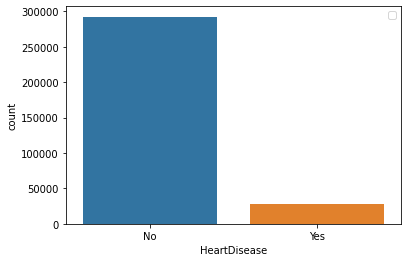

In [91]:
y = sns.countplot(data =df,x='HeartDisease')
y.legend()

In [92]:
df['SkinCancer'].value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

In [93]:
clean_it = {'Female':0,'Male':1,'Yes':1,'No':0}

In [94]:
df = df.replace(clean_it)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,55-59,White,1,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80 or older,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,65-69,White,1,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,75-79,White,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,40-44,White,0,1,Very good,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,60-64,Hispanic,1,0,Fair,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,1,35-39,Hispanic,0,1,Very good,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,0,45-49,Hispanic,0,1,Good,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,0,25-29,Hispanic,0,0,Good,12,0,0,0


In [95]:
df['Diabetic'].value_counts()

0                          269653
1                           40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [96]:
clean_dai = {'No, borderline diabetes':0,'Yes (during pregnancy)':1}

In [97]:
df['Diabetic'] = df['Diabetic'].replace(clean_dai)
df['Diabetic'].value_counts()

0    276434
1     43361
Name: Diabetic, dtype: int64

In [98]:
df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int64
Sex                   int64
AgeCategory          object
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime             int64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [99]:
def clean_age(x):
  y = x.split('-')
  if len(y)==2 :
    return int((int(y[0])+int(y[1]))/2)
  else:
    return int(80)

In [100]:
df['AgeCategory']=df.AgeCategory.apply(clean_age)

In [101]:
 df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,57,White,1,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,67,White,1,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,77,White,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,42,White,0,1,Very good,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,62,Hispanic,1,0,Fair,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,1,37,Hispanic,0,1,Very good,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,0,47,Hispanic,0,1,Good,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,0,27,Hispanic,0,0,Good,12,0,0,0


In [102]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [103]:
#lable encoding
clean_genheal={'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4}

In [104]:
df['GenHealth'] = df['GenHealth'].replace(clean_genheal)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,57,White,1,1,3,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80,White,0,1,3,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,67,White,1,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,77,White,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,42,White,0,1,3,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,62,Hispanic,1,0,1,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,1,37,Hispanic,0,1,3,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,0,47,Hispanic,0,1,2,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,0,27,Hispanic,0,0,2,12,0,0,0


In [105]:
dummy = pd.get_dummies(df.Race)
dummy

,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
319790,0,0,0,1,0,0
319791,0,0,0,1,0,0
319792,0,0,0,1,0,0
319793,0,0,0,1,0,0


In [106]:
df =pd.concat([df,dummy],axis='columns')


In [107]:
df.drop(columns ='Race',inplace =True)

In [108]:
df.dtypes

HeartDisease                        int64
BMI                               float64
Smoking                             int64
AlcoholDrinking                     int64
Stroke                              int64
PhysicalHealth                      int64
MentalHealth                        int64
DiffWalking                         int64
Sex                                 int64
AgeCategory                         int64
Diabetic                            int64
PhysicalActivity                    int64
GenHealth                           int64
SleepTime                           int64
Asthma                              int64
KidneyDisease                       int64
SkinCancer                          int64
American Indian/Alaskan Native      uint8
Asian                               uint8
Black                               uint8
Hispanic                            uint8
Other                               uint8
White                               uint8
dtype: object

In [109]:
#Finding NaN values
df.isna().sum()

HeartDisease                      0
BMI                               0
Smoking                           0
AlcoholDrinking                   0
Stroke                            0
PhysicalHealth                    0
MentalHealth                      0
DiffWalking                       0
Sex                               0
AgeCategory                       0
Diabetic                          0
PhysicalActivity                  0
GenHealth                         0
SleepTime                         0
Asthma                            0
KidneyDisease                     0
SkinCancer                        0
American Indian/Alaskan Native    0
Asian                             0
Black                             0
Hispanic                          0
Other                             0
White                             0
dtype: int64

In [110]:
#Since we Nan Values 
df[df.isna()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
#droping nan Values
df.dropna(inplace=True)

In [112]:

df['SleepTime'].value_counts()

7     97751
8     97602
6     66721
5     19184
9     16041
10     7796
4      7750
12     2205
3      1992
2       788
1       551
11      415
14      243
16      236
15      189
18      102
13       97
20       64
24       30
17       21
22        9
19        3
23        3
21        2
Name: SleepTime, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Sleep Time in Hours')

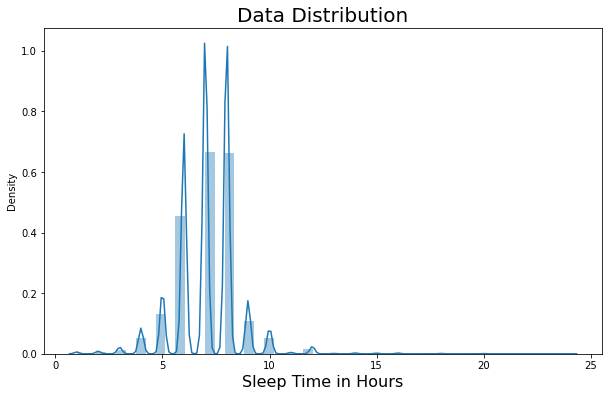

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=[10,6])
fig = sns.distplot(x = df.SleepTime)
fig.set_title('Data Distribution', fontsize=20)
fig.set_xlabel('Sleep Time in Hours', fontsize=16)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Body Mass Index')

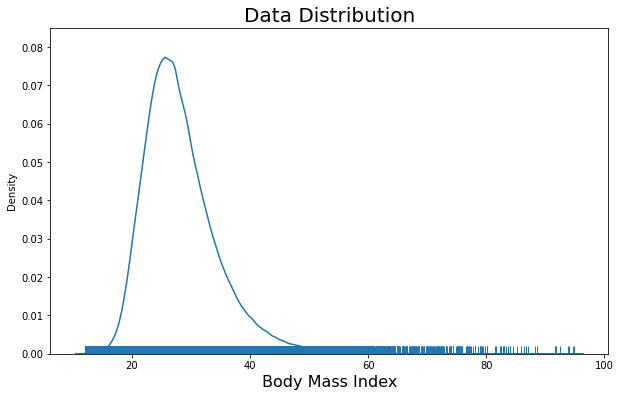

In [114]:
plt.figure(figsize=[10,6])
fig = sns.distplot(x = df.BMI, rug=True, hist=False)
fig.set_title('Data Distribution', fontsize=20)
fig.set_xlabel('Body Mass Index', fontsize=16)

In [115]:
#finding quantile range of 25 to 57 percent of values
Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
Q1, Q3

(24.03, 31.42)

In [116]:
#calculating IQR
IQR = Q3 - Q1
IQR

7.390000000000001

In [117]:
#calculating upper and lowwer limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(12.945, 42.505)

In [118]:
df1 = df.copy()

In [119]:
#outliers in BMI
df1[(df1.BMI<lower_limit)|(df1.BMI>upper_limit)]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
32,0,45.35,0,0,0,30,0,1,1,72,...,8,0,0,0,0,0,0,0,0,1
57,0,46.52,1,0,0,30,0,0,1,67,...,8,1,0,0,0,0,0,0,0,1
90,0,44.29,0,0,0,30,10,1,0,72,...,7,0,0,1,0,0,0,0,0,1
105,0,58.54,0,0,0,30,0,1,1,67,...,3,1,0,0,0,0,0,0,1,0
107,0,45.42,0,0,0,0,0,0,0,47,...,7,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319693,0,44.29,0,0,0,0,0,0,0,27,...,7,0,0,0,0,0,0,1,0,0
319709,0,51.46,1,0,0,30,0,0,1,57,...,7,1,0,0,0,0,0,1,0,0
319725,0,53.16,0,0,0,29,0,1,1,27,...,5,1,0,0,0,0,0,1,0,0
319777,0,42.57,0,0,0,0,0,1,0,62,...,7,0,0,0,0,0,0,1,0,0


In [120]:
#Removing outliers in BMI column
df2 = df[(df.BMI>lower_limit)&(df.BMI<upper_limit)]
df2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3,30,0,0,57,...,5,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0,0,0,0,80,...,7,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20,30,0,1,67,...,8,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0,0,0,0,77,...,6,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28,0,1,0,42,...,8,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0,0,0,0,21,...,8,0,0,0,0,0,0,1,0,0
319790,1,27.41,1,0,0,7,0,1,1,62,...,6,1,0,0,0,0,0,1,0,0
319791,0,29.84,1,0,0,0,0,0,1,37,...,5,1,0,0,0,0,0,1,0,0
319792,0,24.24,0,0,0,0,0,0,0,47,...,6,0,0,0,0,0,0,1,0,0


In [121]:

def get_graph(x,y,t):
   fig, ax = plt.subplots(figsize = (13,6))
   ax.hist(df[df[x]==1][y], bins=15, alpha=0.5, color="red", label="HeartDisease")
   ax.set_xlabel(y)
   ax.set_ylabel("Frequency")

   fig.suptitle(t)

   ax.legend()

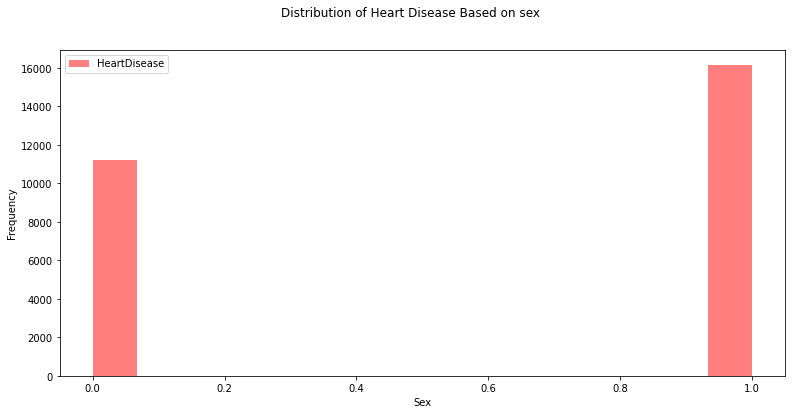

In [122]:
get_graph("HeartDisease","Sex","Distribution of Heart Disease Based on sex")

Males are more likely to have a Heart disease than Females

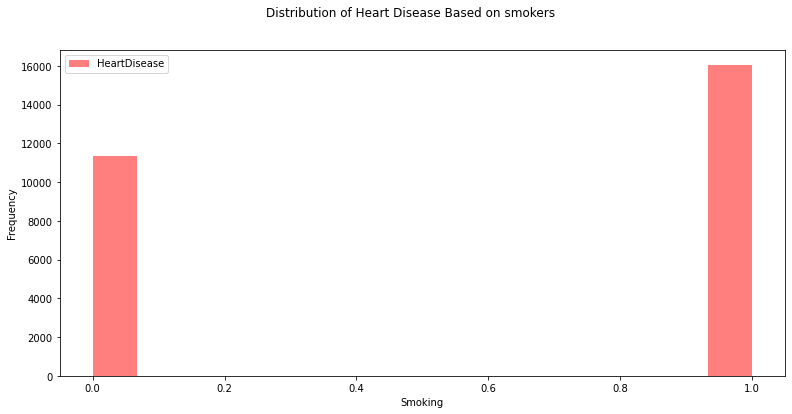

In [123]:
get_graph("HeartDisease","Smoking","Distribution of Heart Disease Based on smokers")

Smokers are more susceptible Heart Disease compare to Non-Smokers

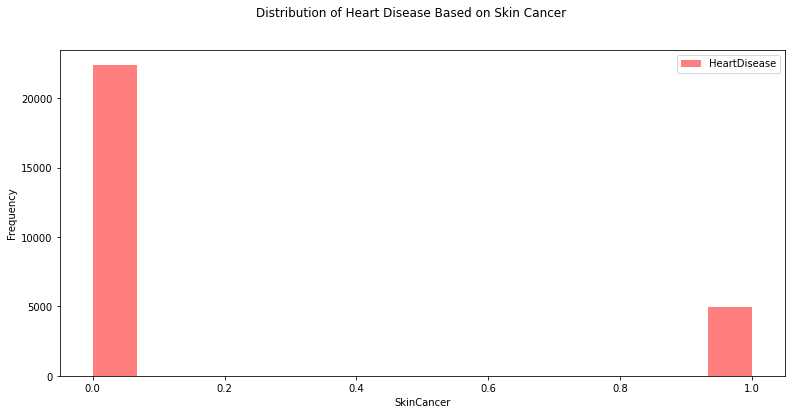

In [124]:
get_graph("HeartDisease","SkinCancer","Distribution of Heart Disease Based on Skin Cancer")

Skin Cancer Doesn't have any influence on Heart Disease





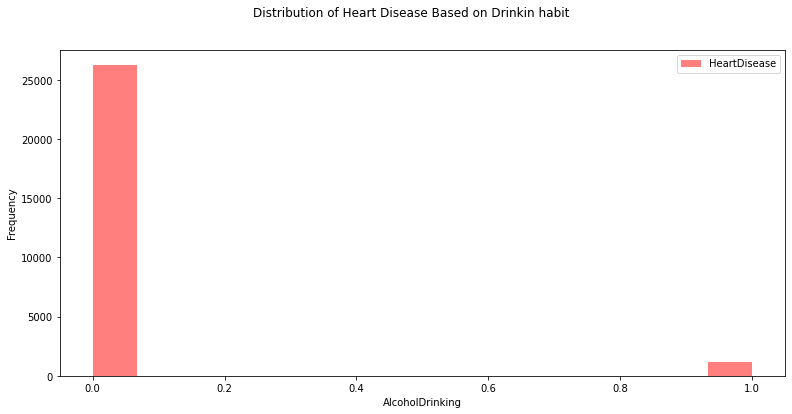

In [125]:
get_graph("HeartDisease","AlcoholDrinking","Distribution of Heart Disease Based on Drinkin habit")

Alcohol Doesn't have any influence on Heart Disease

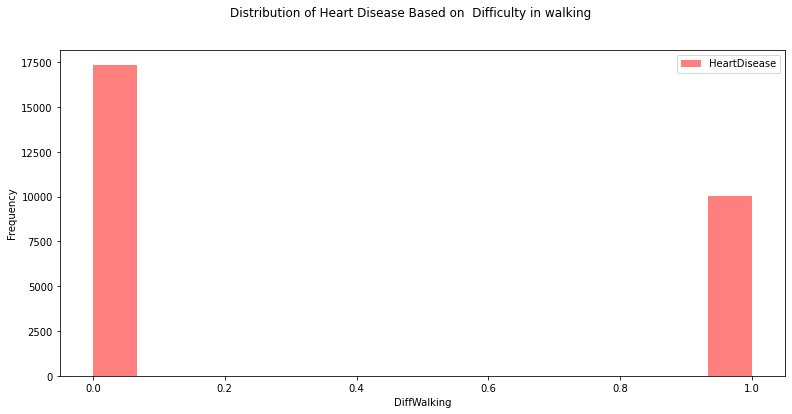

In [126]:
get_graph("HeartDisease","DiffWalking","Distribution of Heart Disease Based on  Difficulty in walking")

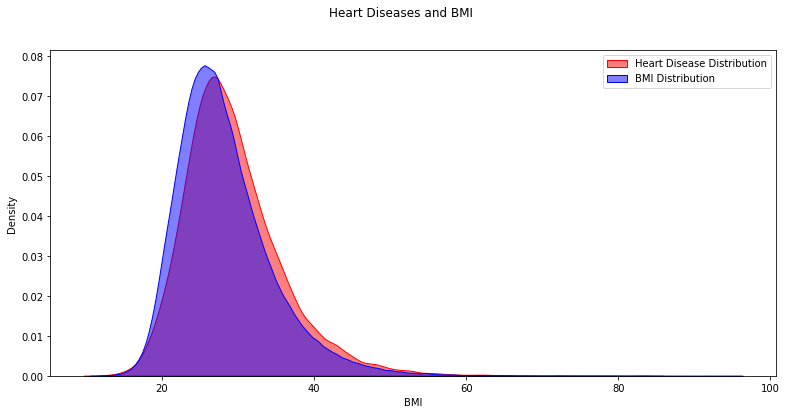

In [127]:
fig, ax = plt.subplots(figsize = (13,6))
ax = sns.kdeplot(df[df['HeartDisease']==1]['BMI'], alpha=0.5, color="red",shade=True, label="Heart Disease Distribution")
ax = sns.kdeplot(df[df['HeartDisease']==0]['BMI'], alpha=0.5, color="Blue",shade=True, label="BMI Distribution")
ax.set_xlabel('BMI')
fig.suptitle("Heart Diseases and BMI")

ax.legend()

The above graph shows that as BMI increasses the chances of Heart Disease also increases

In [128]:
X=df.drop(columns='HeartDisease')
y=df['HeartDisease']

Checking which parameters have more influence on output

In [129]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi = make_mi_scores(X,y, discrete_features= True)
mi[::3]

AgeCategory                       0.033372
Diabetic                          0.013309
KidneyDisease                     0.007830
SleepTime                         0.005014
Hispanic                          0.002549
Asthma                            0.002053
MentalHealth                      0.001503
American Indian/Alaskan Native    0.001219
Name: MI Scores, dtype: float64

In [132]:
import numpy as np

In [130]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

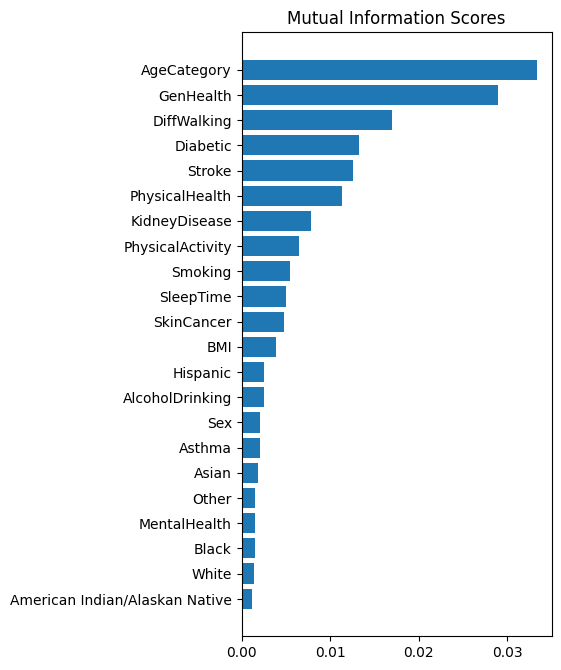

In [133]:

plt.figure(dpi=100, figsize=(4, 8))
plot_mi_scores(mi)

From above fig we can see factors affecting the heart disease

In [ ]:
X.head()

In [ ]:
y.value_counts()

Since we have minory samples of heart disease we are going to use SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [ ]:
X_sm

In [ ]:
y_sm.value_counts()

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.25)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

In [ ]:
from sklearn.model_selection import cross_val_score
model_a =  cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X_train,y_train,cv=5)

In [ ]:
model_a.mean()

In [ ]:

LogisticReg = LogisticRegression(solver='liblinear',multi_class='ovr')
moded_l  = LogisticReg.fit(X_train,y_train)

In [ ]:
pred_l = moded_l.predict(X_test)
moded_l.score(X_test,y_test)

In [ ]:

# cross_val_score(SVC(gamma='auto'),X_train,y_train,cv=5)

In [ ]:

model_b = cross_val_score(RandomForestClassifier(n_estimators=40),X_train,y_train,cv=5)

In [ ]:
model = RandomForestClassifier(n_estimators=40)
model_r = model.fit(X_train,y_train)

In [ ]:
pred_r = model_r.predict(X_test)
model_r.score(X_test,y_test)

In [ ]:
model_b.mean()

In [ ]:
model_c = cross_val_score(XGBRegressor(n_estimators=40),X_train,y_train,cv=5)

In [ ]:
model_c.mean()

Random Forest and Logistic Regression seems to be good canidates for model 

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [134]:
print("Classification Report: \n", classification_report(y_test,pred_l ))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81     73145
           1       0.80      0.83      0.81     73066

    accuracy                           0.81    146211
   macro avg       0.81      0.81      0.81    146211
weighted avg       0.81      0.81      0.81    146211



In [135]:
print("Classification Report: \n", classification_report(y_test,pred_r))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89     73145
           1       0.88      0.91      0.90     73066

    accuracy                           0.89    146211
   macro avg       0.89      0.89      0.89    146211
weighted avg       0.89      0.89      0.89    146211



No handles with labels found to put in legend.


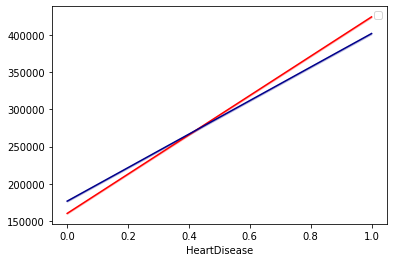

In [137]:
dx = sns.lineplot(x=y_test,y=y_test.index,color='red')
ex =sns.lineplot(x=pred_r,y=y_test.index,color='Darkblue')
dx.legend()